# 1 Author

**Student Name**:  Shrey Suresh Chandra Jakhmola <br>
**Student ID**:  230925447


# 2 Problem formulation

 To develop a machine learning pipeline that determines the healthiness of a dish based on its ingredients. Given a list of ingredients for a particular dish, the model should output a binary classification indicating whether the dish is considered healthy or not.

# 3 Machine Learning pipeline

**The pipeline consists of:**

1. **Initialising the dataset**: Initialising the data from a dataset by reading the CSV file from a location. The data is of the format CSV.

2. **Transformation**: The dataset is then processed for generating a healthy label based on the health rating and the ingredients are processed using the count vector and then transformed the count matrix to a normalized term-frequency times inverse document-frequency vector. The input for the count vector stage is the ingredients of dishes which is a comma separated string containing the list of ingredients for a particular dish along with the label input that is a whether a dish is healthy or not using 0 and 1. The output of the stage is matrix of token counts. The input for the transformer stage is the matrix of count token and output is the normalised term-frequency times inverse document-frequency tuple.

3. **Prediction (model):** The features extracted in the transformation stage are then taken as an input for the model and the model predicts whether then given input features are either healthy or not healthy dish. The input is a normalised term-frequency times inverse document-frequency tuple of a count matrix to the features of a dish, and the columns represent the individual features which is the training data. The label input is a Series containing the target labels for the training data. It represents the ground truth for whether each corresponding dish is healthy or not healthy. The output is a NumPy array containing the predicted labels for the data that is healthy or not healthy

# 4 Transformation stage

The input to this stage is a comma separated list of text and output is the normalised term-frequency times inverse document-frequency tuple.

In this stage,
1. The comma separated text data which is ingredients is fed into the counter vector which produces count matrix. It will produce a count vector of the occurance of the ingredient in the text.
2. The count vector is fed into the term-frequency times inverse document-frequency. The objective of employing tf-idf, as opposed to relying on the raw frequencies of a token's occurrence in a particular document, is to diminish the influence of tokens that frequently appear in a corpus. These frequently occurring tokens are empirically considered less informative than features found in only a small fraction of the training corpus. The output is a normal frequency tuple for the model input

# 5 Modelling

The machine learning model I've constructed is a text classification model designed to predict whether a dish is healthy or not based on its ingredients. The model consists of a RandomForestClassifier as the classifier, integrated into a pipeline structure.

The classifier chosen for this task is a RandomForestClassifier. Random Forests are ensemble learning methods that operate by constructing multiple decision trees during training and outputting the mode of the classes for classification problems. They are robust, handle non-linear relationships well, and can capture complex patterns in the data.
Hyperparameter Tuning:

The model undergoes hyperparameter tuning using GridSearchCV to explore various combinations of hyperparameter values. The hyperparameters include parameters for the vectorizer (ngram_range, use_idf) and RandomForestClassifier (n_estimators, max_depth, min_samples_split, min_samples_leaf). This tuning process is essential for optimizing the model's performance and generalization ability.

The rationale behind choosing this model lies in its ability to handle text data effectively, particularly in the context of ingredient-based predictions. RandomForestClassifier is a versatile algorithm capable of capturing intricate relationships within the feature space, and the use of TF-IDF provides a nuanced representation of the ingredients, giving more weight to terms that are informative for classification.

The hyperparameter tuning is crucial to fine-tune the model's parameters, ensuring optimal performance. By combining these elements, the model aims to achieve a robust and accurate prediction of dish healthiness based on ingredient information.

# 6 Methodology

**Training and Validation of Models, Performance Assessment**

1. **Training data**<br>
    a. We will process the data for feature extraction to extract relevant features from dish images.<br>
    b. Then we will split the data. Splitting the dataset into training and testing sets using train_test_split. This step is crucial to ensure that the model is trained on one subset of the data and validated on another, allowing for an unbiased evaluation of its generalization performance. We will be dedicating 80% of the data for model training and 20% for evaluation.<br>
    c. Training the model on the training set. The model learns to distinguish between features extracted from images of rice and chips. <br>

2. **Validation of models**<br>
    a. Accuracy Calculation: Evaluate the accuracy of the model on both the training and testing sets. <br>
    b. Training accuracy is assessed by scoring the model for the training data and its predicted label used for input<br>
    c. Testing accuracy is computed by scoring the model for the test data and its predicted labels <br>

3. **Performance Assessment**<br>
    a. **Confusion Matrix**: Generating a confusion matrix using test data and its predicted labels. The confusion matrix provides detailed information on the model's performance, indicating true positives, true negatives, false positives, and false negatives. Additionally, visualize the normalized confusion matrix using Seaborn's heatmap.<br>
    b. **Classification report:** Generate classification report using test data and it predicted label to calculate precision, recall, and F1-score for each class, along with overall metrics. It provides insights into the model's performance on a per-class basis.<br>
    c. **Per Class Accuracies**: Calculate per-class accuracies using the confusion matrix. This step provides a nuanced understanding of how well the model performs for each individual class.<br>

4. **Result Analysis and Reporting:** <br>
    a. Interpret the obtained metrics to assess the model's effectiveness. Key considerations include the overall accuracy, per-class performance, and potential class imbalances.

In [1]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00


# 7 Dataset

The dataset we will be using is the MLEnd Yummy dataset from : https://mlend.readthedocs.io/en/latest/#mlend-yummy. The dataset contains more than 3000 images of dishes along with their attributes. We will be using the CSV file along with their attributes for our data and visualisation.

<br><br>
The attributes are: <br>
'filename' : Name of the image file <br>
'Diet': Vegetarian/vegan/Non-vegetarian<br>
'Cuisine_org': Type of cuisine <br>
'Cuisine': Type of cuisine<br>
'Dish_name': Name of the dish<br>
'Home_or_restaurant': Whether the dish was prepared in home or restaurant<br>
'Ingredients': Ingredients of the dish<br>
'Healthiness_rating': Whether is the dish is healtly not healthy etc<br>
'Healthiness_rating_int': Numeric Healthiness_rating<br>
'Likeness': Like or dis-like etc<br>
'Likeness_int': Numeric Likeness<br>
'Benchmark_A': Whether row to be used as test or train<br>
<br>
1. Attributes used in experiment: Ingredients and Healthy_Label derived from Healthiness_rating_int
2. Attributes used in visualisation: Healthiness_rating_int, Likeliness_int

<h3>Downloading the data and displaying the unique ratings</h3>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import multiprocessing

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

import mlend
from mlend import download_yummy, yummy_load

import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion

#downloading the data
drive.mount('/content/drive', force_remount=True)
subset = {}
datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEndBigSet/', subset = subset,verbose=1,overwrite=False)

#reading the data csv with attributes of the images
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEndBigSet/yummy/MLEndYD_image_attributes_benchmark.csv')
MLENDYD_df = MLENDYD_df.dropna(subset=['Ingredients', 'Healthiness_rating'])

#Displaying the unique ratings
print("Healthiness_rating:", MLENDYD_df['Healthiness_rating'].unique())
print("Healthiness_rating_int:", MLENDYD_df['Healthiness_rating_int'].unique())



Mounted at /content/drive
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!
Healthiness_rating: ['neutral' 'unhealthy' 'healthy' 'very_healthy' 'very_unhealthy']
Healthiness_rating_int: [3. 2. 4. 5. 1.]


<h3>Preprocessing the dataset label to generate custom binary label for healthiness rating</h3>

In [13]:
#Defining a binary threshold of 4 and marking healthy and very healthy dishes as 1 and others as 0 (unhealthy)
binary_threshold = 4
MLENDYD_df['Healthy_Label'] = (MLENDYD_df['Healthiness_rating_int'] >= binary_threshold).astype(int)

print("Healthy_Label value count: ", MLENDYD_df['Healthy_Label'].value_counts())

#balacing dataset by taking equal number of healthy and unhealthy samples
MLENDYD_df_1 = MLENDYD_df[MLENDYD_df['Healthy_Label'].isin([1])].tail(1375)
MLENDYD_df_0 = MLENDYD_df[MLENDYD_df['Healthy_Label'].isin([0])]
MLENDYD_df = pd.concat([MLENDYD_df_0, MLENDYD_df_1])

Healthy_Label value count:  1    1874
0    1375
Name: Healthy_Label, dtype: int64


<h3>Visualizing the samples after preprocessing</h3>

1. Word Cloud for Ingredients:

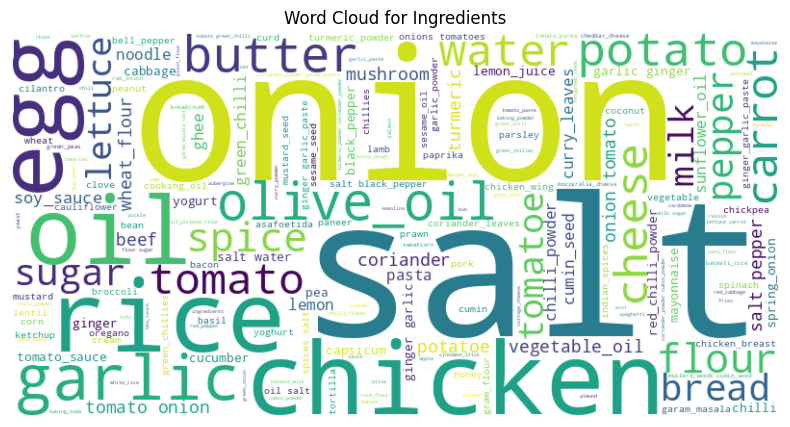

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all ingredients into a single string
all_ingredients = ','.join(MLENDYD_df['Ingredients'])

# Generate and plot a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ingredients')
plt.show()


2. Boxen plot for Likeness_int vs. Healthy_Label:

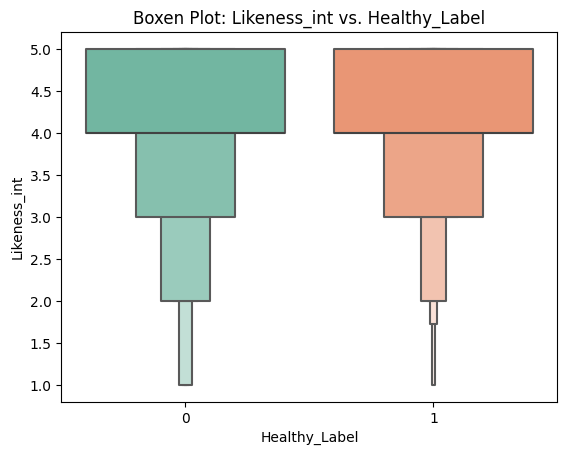

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxen plot
sns.boxenplot(x='Healthy_Label', y='Likeness_int', data=MLENDYD_df, palette='Set2')
plt.title('Boxen Plot: Likeness_int vs. Healthy_Label')
plt.xlabel('Healthy_Label')
plt.ylabel('Likeness_int')
plt.show()


<h3>Extracting features from the Ingredients</h3>

In [ ]:
# Extract features and labels
y = MLENDYD_df['Healthy_Label']
X = MLENDYD_df['Ingredients']

# Create separate pipelines for vectorization and classification
vectorizer_transformer_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

# 8 Results



We will now split the dataset into a test and train dataset and train our model

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the model
classifier_pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Combine the pipelines using FeatureUnion
text_clf = Pipeline([
    ('features', FeatureUnion([
        ('vectorizer_transformer', vectorizer_transformer_pipeline)
    ])),
    ('clf', RandomForestClassifier())
])

# Define hyperparameters to search --These parameters didn't provide good results
# parameters = {
#     'vect__ngram_range': [(1, 1), (1, 2)],
#     'tfidf__use_idf': (True, False),
#     'clf__n_estimators': [50, 100],
#     'clf__max_depth': [None, 10],
# }

# Define hyperparameters to search
parameters = {
    'features__vectorizer_transformer__vect__ngram_range': [(1, 1), (1, 2)],
    'features__vectorizer_transformer__tfidf__use_idf': (True, False),
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a progress bar
total_iterations = len(parameters['features__vectorizer_transformer__vect__ngram_range']) * \
                   len(parameters['features__vectorizer_transformer__tfidf__use_idf']) * \
                   len(parameters['clf__n_estimators']) * len(parameters['clf__max_depth'])
pbar = tqdm(total=total_iterations)

# Use GridSearchCV with parallelization and tqdm progress bar
grid_search = GridSearchCV(text_clf, parameters, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)
grid_search.fit(X_train, y_train)

# Close the progress bar
pbar.close()

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on testing set using the best model
test_predictions = best_model.predict(X_test)


  0%|          | 0/36 [00:00<?, ?it/s]

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


  0%|          | 0/36 [07:37<?, ?it/s]


We will now generate the test accuracy, train accuracy, confusion matrix, per class accuracies and classification report

Best Model Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100, 'features__vectorizer_transformer__tfidf__use_idf': False, 'features__vectorizer_transformer__vect__ngram_range': (1, 1)}


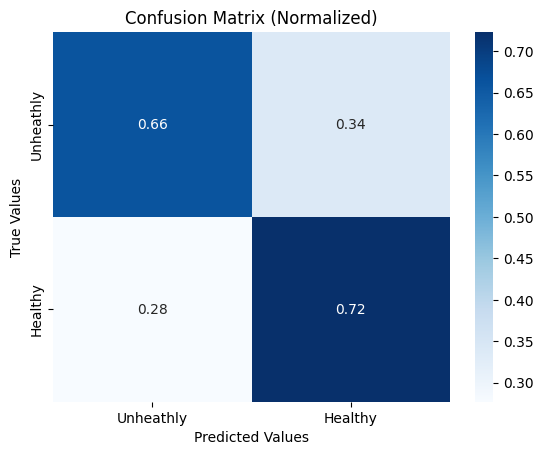

Training Accuracy: 0.9968181818181818
Testing Accuracy: 0.6909090909090909

Per Class Accuracies:
Class 'Unheathly' Accuracy: 66.08%
Class 'Healthy' Accuracy: 72.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       283
           1       0.67      0.72      0.69       267

    accuracy                           0.69       550
   macro avg       0.69      0.69      0.69       550
weighted avg       0.69      0.69      0.69       550



In [15]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the best model
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Display results
print("Best Model Parameters:", grid_search.best_params_)

# Classification Report
class_report = classification_report(y_test, test_predictions)

# Calculate per class accuracies
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Visualize Confusion Matrix
class_labels = ["Unheathly", "Healthy"]
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix (Normalized)")
plt.show()

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nPer Class Accuracies:")
for label, acc in zip(class_labels, class_accuracies):
    print(f"Class '{label}' Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(class_report)

<h4>Interpreting the ouput</h4><br>
1. Training Accuracy: The training accuracy is a measure of how well the model performs on the training dataset. In our case, it's approximately 99.68%. This indicates that the model is very accurate on the data it was trained on.<br><br>
2. Testing Accuracy: The testing accuracy is a measure of how well the model generalizes to new, unseen data. In our case, it's approximately 69.09%. This is lower than the training accuracy, suggesting that the model may not generalize as well to new data.<br><br>
3. Class 'Unhealthy' Accuracy: The accuracy for predicting the 'Unhealthy' class is 66.08%. This means that, among all instances labeled as 'Unhealthy', the model correctly predicted about 66.08% of them.<br><br>
4. Class 'Healthy' Accuracy: The accuracy for predicting the 'Healthy' class is 72.28%. This means that, among all instances labeled as 'Healthy', the model correctly predicted about 72.28% of them.<br><br>

Classification Report:<br>
1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For 'Unhealthy', it's 0.72, and for 'Healthy', it's 0.67.<br><br>
2. Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For 'Unhealthy', it's 0.66, and for 'Healthy', it's 0.72.<br><br>
3. F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For both classes, it's around 0.69.<br><br>
4. Support: The number of actual occurrences of the class in the specified dataset. For 'Unhealthy', it's 283, and for 'Healthy', it's 267.

# 9 Conclusions

1. The model shows a significant difference between training accuracy (approximately 99.68%) and testing accuracy (approximately 69.09%). This suggests potential overfitting, where the model is too tailored to the training data and does not generalize well to new, unseen data.
2. The model performs reasonably well in distinguishing between 'Unhealthy' and 'Healthy' classes, with class accuracies around 66.08% and 72.28%, respectively. but can be improved.
3. Precision and recall values are balanced for both classes, as indicated by F1-scores around 0.69. This suggests a reasonable trade-off between false positives and false negatives.

Improvements
1. Address Overfitting: Adjusting the model's complexity or introducing regularization techniques to mitigate overfitting. This could involve tuning hyperparameters, reducing the complexity of the model, or increasing the amount of training data.

2. Hyperparameter Tuning: Revisiting the hyperparameter tuning process. It's possible that the current set of hyperparameters is not optimal.

3. Ensemble Methods: Experimenting with ensemble methods. Since the problem involves a RandomForestClassifier, trying other ensemble methods or combinations of models to improve overall performance.